In [1]:
%load_ext autoreload
%autoreload 2

We are using the Upper Confidence Bound for MCTS

$$
U(s, a) = Q(s, a) + c_{puct} P(s, a) \frac{\sqrt{\sum_b N(s, b)}}{1 + N(s, a)}
$$

# Comments on current implementation

- Ideally, the first adviser should rather allow more advisable actions, and afford itself a larger number of simulations to gain at least some depth.



In [2]:
BOARD_SIZE=15
stones = 'J10I11K10I9I10H10L10M10J12J8K7G11F12H12J11I13'

In [3]:
from aegomoku.policies.topological_value import TopologicalValuePolicy

adviser = TopologicalValuePolicy(BOARD_SIZE)

In [22]:
from aegomoku.interfaces import MctsParams
from aegomoku.gomoku_game import GomokuGame
from aegomoku.mcts import MCTS

game = GomokuGame(BOARD_SIZE)
params = MctsParams(cpuct=3.0, temperature=1.0, num_simulations=1600, gamma=1.0)
mcts = MCTS(game, adviser, params)

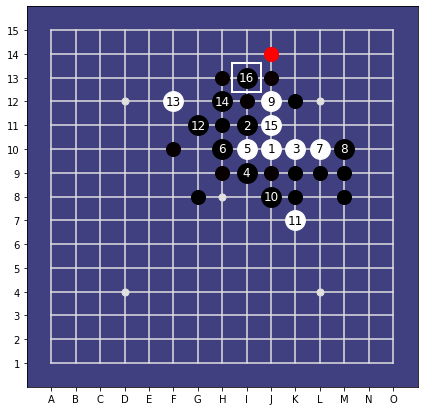

In [23]:
from aegomoku.utils import analyse_board
from aegomoku.gomoku_board import GomokuBoard

board = GomokuBoard(BOARD_SIZE, stones=stones)
analyse_board(BOARD_SIZE, stones, adviser, disp_width=7)

In [25]:
probs = mcts.get_action_prob(board, temperature=1.0)

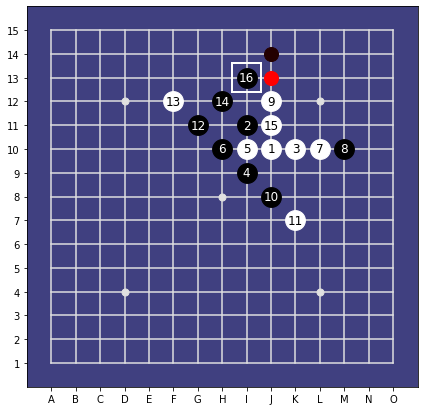

In [26]:
analyse_board(BOARD_SIZE, stones, probs, disp_width=7)